In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import os

def download_data(path):
  data = []
  for path_image in sorted(os.listdir(path=path)):
    image = Image.open(path + path_image) #Открываем изображение.
    data.append(np.array(image)) #Загружаем пиксели.
  return data

X_train = download_data(r"/content/drive/MyDrive/Colab/Метод машинного обучения/lab3_data/train/image/")
Y_train = download_data(r"/content/drive/MyDrive/Colab/Метод машинного обучения/lab3_data/train/label/")
X_test = download_data(r"/content/drive/MyDrive/Colab/Метод машинного обучения/lab3_data/test/image/")
Y_test = download_data(r"/content/drive/MyDrive/Colab/Метод машинного обучения/lab3_data/test/label/")


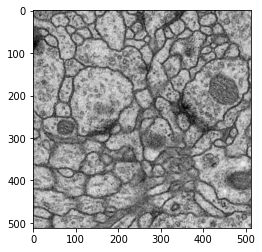

In [4]:
I = 0 # номер изображения для вывода
plt.imshow(X_train[I], cmap='gray') # вывод изображения на экран

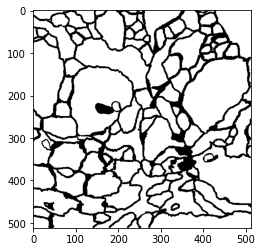

In [5]:
I = 0 # номер изображения для вывода
plt.imshow(Y_train[I], cmap='gray') # вывод изображения на экран

In [6]:
X_train_pred = np.array(X_train).reshape([30, 512, 512, 1])/255
Y_train_pred = np.array(Y_train).reshape([30, 512, 512, 1])/255

X_test_pred = np.array(X_test).reshape([30, 512, 512, 1])/255
Y_test_pred = np.array(Y_test).reshape([30, 512, 512, 1])/255

In [7]:
import numpy as np 
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(64, 5, input_shape=[512, 512, 1], activation = 'relu', padding = 'same'))
model.add(Conv2D(64, 5, activation = 'relu', padding = 'same'))
model.add(Conv2D(64, 5, activation = 'relu', padding = 'same'))
model.add(Conv2D(64, 5, activation = 'relu', padding = 'same'))
model.add(Conv2D(64, 5, activation = 'relu', padding = 'same'))
model.add(Conv2D(1, 1, activation = 'sigmoid'))
model.compile(optimizer = 'Adam', loss = 'mse')

In [8]:
model.fit(X_train_pred, Y_train_pred, epochs=20, batch_size=1)

Epoch 1/20
30/30 [==============================] - 49s 578ms/step - loss: 0.1525
Epoch 2/20
30/30 [==============================] - 17s 579ms/step - loss: 0.1120
Epoch 3/20
30/30 [==============================] - 17s 581ms/step - loss: 0.1081
Epoch 4/20
30/30 [==============================] - 17s 583ms/step - loss: 0.1006
Epoch 5/20
30/30 [==============================] - 17s 583ms/step - loss: 0.0993
Epoch 6/20
30/30 [==============================] - 18s 584ms/step - loss: 0.0973
Epoch 7/20
30/30 [==============================] - 18s 585ms/step - loss: 0.0939
Epoch 8/20
30/30 [==============================] - 18s 584ms/step - loss: 0.0927
Epoch 9/20
30/30 [==============================] - 17s 583ms/step - loss: 0.0864
Epoch 10/20
30/30 [==============================] - 18s 584ms/step - loss: 0.0865
Epoch 11/20
30/30 [==============================] - 18s 583ms/step - loss: 0.0836
Epoch 12/20
30/30 [==============================] - 18s 584ms/step - loss: 0.0825
Epoch 13/20
3

In [9]:
print("MSE: ", model.evaluate(X_test_pred, Y_test_pred, batch_size=1))

30/30 [==============================] - 6s 209ms/step - loss: 0.2054
MSE:  0.20535892248153687


In [10]:
out = model.predict(X_test_pred, batch_size=1)

<Figure size 1080x576 with 0 Axes>

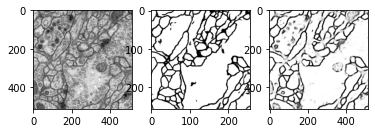

In [13]:
I = 0 # номер картинки после обработки нейронной сетью
plt.figure(figsize=(15,8))
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
ax1.imshow(X_test[I], cmap='gray')
ax2.imshow(Y_test[I], cmap='gray')
ax3.imshow(out[I].reshape([512, 512]), cmap='gray')